# 1. 坐标系

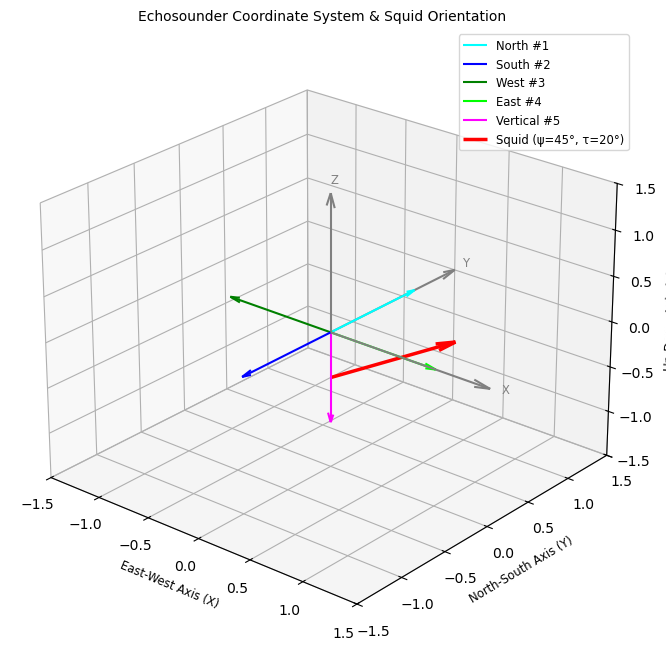

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 参数设置 ---
# 您可以修改这两个角度来看不同姿态下的鱿鱼位置
# 方向角 (Yaw, 0°=East, 90°=North)
psi_deg = 45
# 倾斜角 (Tilt, 正数=头朝上)
tau_deg = 20
# ---

# 将角度转换为弧度
psi = np.deg2rad(psi_deg)
tau = np.deg2rad(tau_deg)

# 创建3D绘图区域
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 1. 绘制世界坐标系轴
arrow_length = 1.5
ax.quiver(0, 0, 0, arrow_length, 0, 0, color='gray', arrow_length_ratio=0.1, label='East (+X)')
ax.quiver(0, 0, 0, 0, arrow_length, 0, color='gray', arrow_length_ratio=0.1, label='North (+Y)')
ax.quiver(0, 0, 0, 0, 0, arrow_length, color='gray', arrow_length_ratio=0.1, label='Up (+Z)')

# 2. 定义并绘制5个波束方向
beam_vectors = {
    'North #1': np.array([0, 1, 0]),
    'South #2': np.array([0, -1, 0]),
    'West #3': np.array([-1, 0, 0]),
    'East #4': np.array([1, 0, 0]),
    'Vertical #5': np.array([0, 0, -1])
}

beam_colors = {
    'North #1': 'cyan',
    'South #2': 'blue',
    'West #3': 'green',
    'East #4': 'lime',
    'Vertical #5': 'magenta'
}

for name, vec in beam_vectors.items():
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=beam_colors[name], arrow_length_ratio=0.1, label=name)

# 3. 计算鱿鱼的姿态向量
squid_vector = np.array([
    np.cos(tau) * np.cos(psi),
    np.cos(tau) * np.sin(psi),
    np.sin(tau)
])

# 4. 绘制鱿鱼姿态向量
# 将鱿鱼箭头向下移动，使其起始点在 Z=-0.5
squid_start_z = -0.5
ax.quiver(0, 0, squid_start_z, squid_vector[0], squid_vector[1], squid_vector[2],
          color='red', linewidth=2.5, arrow_length_ratio=0.15, label=f'Squid (ψ={psi_deg}°, τ={tau_deg}°)')

# 5. 计算并打印入射角
print("-" * 40)
print(f"Calculated incidence angles for squid at:")
print(f"  - Yaw (ψ): {psi_deg}°")
print(f"  - Tilt (τ): {tau_deg}°")
print("-" * 40)

for name, vec in beam_vectors.items():
    # 计算点积. 使用 np.clip 避免浮点误差导致 arccos 定义域问题
    dot_product = np.clip(np.dot(vec, squid_vector), -1.0, 1.0)
    
    # 计算角度（弧度），然后转换为度
    angle_rad = np.arccos(dot_product)
    angle_deg = np.rad2deg(angle_rad)
    
    print(f"Incidence angle for {name:<12}: {angle_deg:.2f} degrees")

print("-" * 40)


# 6. 设置图表样式
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('East-West Axis (X)')
ax.set_ylabel('North-South Axis (Y)')
ax.set_zlabel('Up-Down Axis (Z)')
ax.set_title('Echosounder Coordinate System & Squid Orientation')
ax.legend()
ax.grid(True)

# 设置视角
ax.view_init(elev=25, azim=-50)

# 保存并显示图表
plt.savefig('coordinate_system_visualization.png', dpi=300)
print("图表已保存为 'coordinate_system_visualization.png'")
plt.show()

# GUI 展示界面

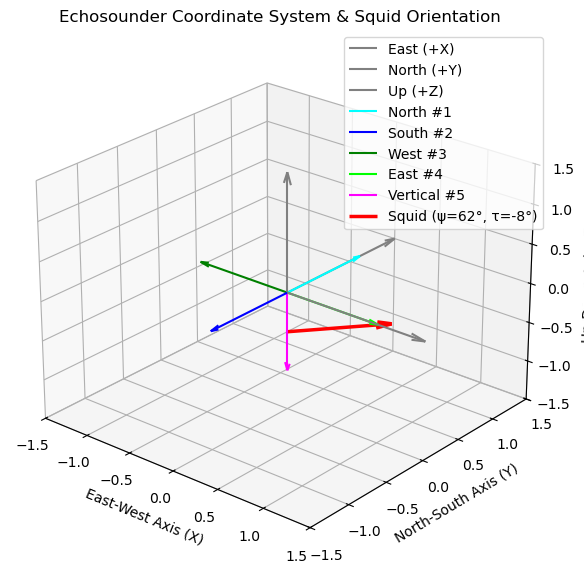

In [ ]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from pathlib import Path

class SquidAngleGUI:
    def __init__(self, master):
        self.master = master
        master.title("鱿鱼姿态与声波入射角计算器V1.0 © Tong 2025")
        master.geometry("1000x750")

        # --- 创建主框架 ---
        main_frame = ttk.Frame(master, padding="10")
        main_frame.pack(fill=tk.BOTH, expand=True)

        # 控制区框架
        control_frame = ttk.LabelFrame(main_frame, text="控制参数", padding="10")
        control_frame.pack(side=tk.LEFT, fill=tk.Y, padx=(0, 10))

        # 图表区框架
        plot_frame = ttk.Frame(main_frame)
        plot_frame.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)

        # --- 创建控制组件 ---
        # 方向角 (Yaw)
        ttk.Label(control_frame, text="方向角 (Yaw ψ, 0-360°):").pack(pady=(0, 5))
        self.psi_slider = ttk.Scale(control_frame, from_=0, to=360, orient=tk.HORIZONTAL, length=200)
        self.psi_slider.set(45)
        self.psi_slider.pack(pady=(0, 10))
        self.psi_label = ttk.Label(control_frame, text=f"{self.psi_slider.get():.0f}°")
        self.psi_label.pack()
        self.psi_slider.config(command=lambda v: self.psi_label.config(text=f"{float(v):.0f}°"))

        # 倾斜角 (Tilt)
        ttk.Label(control_frame, text="倾斜角 (Tilt τ, -90-90°):").pack(pady=(10, 5))
        self.tau_slider = ttk.Scale(control_frame, from_=-90, to=90, orient=tk.HORIZONTAL, length=200)
        self.tau_slider.set(20)
        self.tau_slider.pack(pady=(0, 10))
        self.tau_label = ttk.Label(control_frame, text=f"{self.tau_slider.get():.0f}°")
        self.tau_label.pack()
        self.tau_slider.config(command=lambda v: self.tau_label.config(text=f"{float(v):.0f}°"))

        # Z轴位置
        ttk.Label(control_frame, text="鱿鱼Z轴位置:").pack(pady=(10, 5))
        self.z_pos_var = tk.StringVar(value="-0.5")
        self.z_pos_entry = ttk.Entry(control_frame, textvariable=self.z_pos_var, width=10)
        self.z_pos_entry.pack()

        # 更新按钮
        self.update_button = ttk.Button(control_frame, text="更新图表和计算", command=self.update_plot)
        self.update_button.pack(pady=20)

        # 结果显示区
        ttk.Label(control_frame, text="计算结果 (入射角):").pack(pady=(10, 5))
        self.result_text = tk.Text(control_frame, height=10, width=35, wrap="word")
        self.result_text.pack()

        # --- 创建Matplotlib图表 ---
        self.fig = plt.figure(figsize=(8, 7))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.canvas = FigureCanvasTkAgg(self.fig, master=plot_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # 初始化图表
        self.update_plot()

    def update_plot(self):
        # 清空之前的绘图
        self.ax.clear()

        # 获取GUI输入值
        psi_deg = self.psi_slider.get()
        tau_deg = self.tau_slider.get()
        try:
            squid_start_z = float(self.z_pos_var.get())
        except ValueError:
            squid_start_z = 0.0 # 如果输入无效，则默认为0

        # 角度转弧度
        psi = np.deg2rad(psi_deg)
        tau = np.deg2rad(tau_deg)

        # 1. 绘制世界坐标系轴
        arrow_length = 1.5
        self.ax.quiver(0, 0, 0, arrow_length, 0, 0, color='gray', arrow_length_ratio=0.1) # 移除标签
        self.ax.quiver(0, 0, 0, 0, arrow_length, 0, color='gray', arrow_length_ratio=0.1) # 移除标签
        self.ax.quiver(0, 0, 0, 0, 0, arrow_length, color='gray', arrow_length_ratio=0.1) # 移除标签

        # 直接在轴箭头上添加X, Y, Z标签
        text_offset = 0.1 # 调整标签位置
        self.ax.text(arrow_length + text_offset, 0, 0, 'X', color='gray', fontsize='small')
        self.ax.text(0, arrow_length + text_offset, 0, 'Y', color='gray', fontsize='small')
        self.ax.text(0, 0, arrow_length + text_offset, 'Z', color='gray', fontsize='small')

        # 2. 定义并绘制5个波束方向
        beam_vectors = {
            'North #1': np.array([0, 1, 0]), 'South #2': np.array([0, -1, 0]),
            'West #3': np.array([-1, 0, 0]), 'East #4': np.array([1, 0, 0]),
            'Vertical #5': np.array([0, 0, -1])
        }
        beam_colors = {'North #1': 'cyan', 'South #2': 'blue', 'West #3': 'green', 'East #4': 'lime', 'Vertical #5': 'magenta'}
        for name, vec in beam_vectors.items():
            self.ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=beam_colors[name], arrow_length_ratio=0.1, label=name)

        # 3. 计算并绘制鱿鱼姿态向量
        squid_vector = np.array([np.cos(tau) * np.cos(psi), np.cos(tau) * np.sin(psi), np.sin(tau)])
        self.ax.quiver(0, 0, squid_start_z, squid_vector[0], squid_vector[1], squid_vector[2],
                       color='red', linewidth=2.5, arrow_length_ratio=0.15, label=f'Squid (ψ={psi_deg:.0f}°, τ={tau_deg:.0f}°)')

        # 4. 计算并显示入射角
        self.result_text.delete(1.0, tk.END) # 清空文本框
        result_str = f"姿态: Yaw={psi_deg:.1f}°, Tilt={tau_deg:.1f}°\n" + "-"*30 + "\n"
        for name, vec in beam_vectors.items():
            dot_product = np.clip(np.dot(vec, squid_vector), -1.0, 1.0)
            angle_rad = np.arccos(dot_product)
            angle_deg = np.rad2deg(angle_rad)
            result_str += f"{name:<12}: {angle_deg:.2f} 度\n"
        self.result_text.insert(tk.END, result_str)

        # 5. 设置图表样式
        self.ax.set_xlim([-1.5, 1.5]); self.ax.set_ylim([-1.5, 1.5]); self.ax.set_zlim([-1.5, 1.5])
        self.ax.set_xlabel('East-West Axis (X)', fontsize='small'); self.ax.set_ylabel('North-South Axis (Y)', fontsize='small'); self.ax.set_zlabel('Up-Down Axis (Z)', fontsize='small')
        self.ax.set_title('Echosounder Coordinate System & Squid Orientation', fontsize='medium')
        self.ax.legend(fontsize='small') # 设置图例字体大小
        self.ax.grid(True)
        self.ax.view_init(elev=25, azim=-50)

        # 重新绘制画布
        self.canvas.draw()

if __name__ == '__main__':
    import os
    import sys

    def resource_path(relative_path):
        """ 获取资源的绝对路径，适用于开发环境和PyInstaller打包环境 """
        try:
            # PyInstaller 创建一个临时文件夹，并将路径存储在 _MEIPASS 中
            base_path = sys._MEIPASS
        except Exception:
            base_path = os.path.abspath(".")
        return os.path.join(base_path, relative_path)

    root = tk.Tk()
    try:
        # 显式设置窗口图标
        root.iconbitmap(resource_path('icon.ico'))
    except Exception as e:
        print(f"加载图标失败: {e}")
        
    app = SquidAngleGUI(root)
    root.mainloop()


# GUI English Ver

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_20744\1085260170.py", line 27, in <lambda>
    self.psi_slider = ttk.Scale(control_frame, from_=0, to=360, orient=tk.HORIZONTAL, length=200, command=lambda v: self.update_plot())
                                                                                                                    ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_20744\1085260170.py", line 67, in update_plot
    self.psi_label.config(text=f"{self.psi_slider.get():.0f}°")
    ^^^^^^^^^^^^^^
AttributeError: 'SquidAngleGUI' object has no attribute 'psi_label'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
       

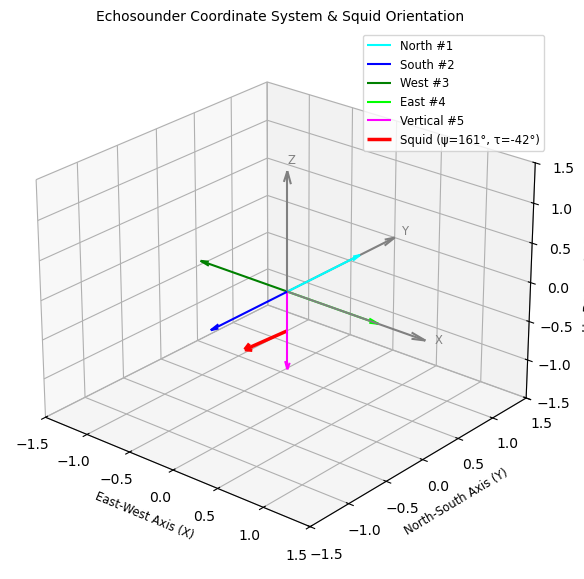

In [19]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from pathlib import Path

class SquidAngleGUI:
    def __init__(self, master):
        self.master = master
        master.title("Squid Attitude & Acoustic Incidence Angle Calculator © Tong 2025")
        master.geometry("1000x750")

        # --- Main Frames ---
        main_frame = ttk.Frame(master, padding="10")
        main_frame.pack(fill=tk.BOTH, expand=True)

        control_frame = ttk.LabelFrame(main_frame, text="Control Parameters", padding="10")
        control_frame.pack(side=tk.LEFT, fill=tk.Y, padx=(0, 10))

        plot_frame = ttk.Frame(main_frame)
        plot_frame.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)

        # --- Control Widgets ---
        # Yaw
        ttk.Label(control_frame, text="Direction (Yaw ψ, 0-360°):").pack(pady=(0, 5))
        self.psi_slider = ttk.Scale(control_frame, from_=0, to=360, orient=tk.HORIZONTAL, length=200, command=lambda v: self.update_plot())
        self.psi_slider.set(45)
        self.psi_slider.pack(pady=(0, 10))
        self.psi_label = ttk.Label(control_frame, text=f"{self.psi_slider.get():.0f}°")
        self.psi_label.pack()

        # Tilt
        ttk.Label(control_frame, text="Tilt (Tilt τ, -90-90°):").pack(pady=(10, 5))
        self.tau_slider = ttk.Scale(control_frame, from_=-90, to=90, orient=tk.HORIZONTAL, length=200, command=lambda v: self.update_plot())
        self.tau_slider.set(20)
        self.tau_slider.pack(pady=(0, 10))
        self.tau_label = ttk.Label(control_frame, text=f"{self.tau_slider.get():.0f}°")
        self.tau_label.pack()

        # Z-Position
        ttk.Label(control_frame, text="Squid Z-axis Position:").pack(pady=(10, 5))
        self.z_pos_var = tk.StringVar(value="-0.5")
        self.z_pos_entry = ttk.Entry(control_frame, textvariable=self.z_pos_var, width=10)
        self.z_pos_entry.pack()

        # Update Button (still useful for Z-pos entry)
        self.update_button = ttk.Button(control_frame, text="Update Plot & Calculate", command=self.update_plot)
        self.update_button.pack(pady=20)

        # Results Display
        ttk.Label(control_frame, text="Calculation Results (Incidence Angles):").pack(pady=(10, 5))
        self.result_text = tk.Text(control_frame, height=10, width=35, wrap="word")
        self.result_text.pack()

        # --- Matplotlib Chart ---
        self.fig = plt.figure(figsize=(8, 7))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.canvas = FigureCanvasTkAgg(self.fig, master=plot_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # Initial plot
        self.update_plot()

    def update_plot(self, event=None):
        # Update slider labels
        self.psi_label.config(text=f"{self.psi_slider.get():.0f}°")
        self.tau_label.config(text=f"{self.tau_slider.get():.0f}°")
        
        self.ax.clear()

        psi_deg = self.psi_slider.get()
        tau_deg = self.tau_slider.get()
        try:
            squid_start_z = float(self.z_pos_var.get())
        except ValueError:
            squid_start_z = 0.0

        psi = np.deg2rad(psi_deg)
        tau = np.deg2rad(tau_deg)

        # 1. World coordinate system axes
        arrow_length = 1.5
        self.ax.quiver(0, 0, 0, arrow_length, 0, 0, color='gray', arrow_length_ratio=0.1)
        self.ax.quiver(0, 0, 0, 0, arrow_length, 0, color='gray', arrow_length_ratio=0.1)
        self.ax.quiver(0, 0, 0, 0, 0, arrow_length, color='gray', arrow_length_ratio=0.1)

        text_offset = 0.1
        self.ax.text(arrow_length + text_offset, 0, 0, 'X', color='gray', fontsize='small')
        self.ax.text(0, arrow_length + text_offset, 0, 'Y', color='gray', fontsize='small')
        self.ax.text(0, 0, arrow_length + text_offset, 'Z', color='gray', fontsize='small')

        # 2. Beam vectors
        beam_vectors = {
            'North #1': np.array([0, 1, 0]), 'South #2': np.array([0, -1, 0]),
            'West #3': np.array([-1, 0, 0]), 'East #4': np.array([1, 0, 0]),
            'Vertical #5': np.array([0, 0, -1])
        }
        beam_colors = {'North #1': 'cyan', 'South #2': 'blue', 'West #3': 'green', 'East #4': 'lime', 'Vertical #5': 'magenta'}
        for name, vec in beam_vectors.items():
            self.ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=beam_colors[name], arrow_length_ratio=0.1, label=name)

        # 3. Squid attitude vector
        squid_vector = np.array([np.cos(tau) * np.cos(psi), np.cos(tau) * np.sin(psi), np.sin(tau)])
        self.ax.quiver(0, 0, squid_start_z, squid_vector[0], squid_vector[1], squid_vector[2],
                       color='red', linewidth=2.5, arrow_length_ratio=0.15, label=f'Squid (ψ={psi_deg:.0f}°, τ={tau_deg:.0f}°)')

        # 4. Calculate and display incidence angles
        self.result_text.delete(1.0, tk.END)
        result_str = f"Attitude: Yaw={psi_deg:.1f}°, Tilt={tau_deg:.1f}°\n" + "-"*30 + "\n"
        for name, vec in beam_vectors.items():
            dot_product = np.clip(np.dot(vec, squid_vector), -1.0, 1.0)
            angle_rad = np.arccos(dot_product)
            angle_deg = np.rad2deg(angle_rad)
            result_str += f"{name:<12}: {angle_deg:.2f} degrees\n"
        self.result_text.insert(tk.END, result_str)

        # 5. Chart styling
        self.ax.set_xlim([-1.5, 1.5]); self.ax.set_ylim([-1.5, 1.5]); self.ax.set_zlim([-1.5, 1.5])
        self.ax.set_xlabel('East-West Axis (X)', fontsize='small'); self.ax.set_ylabel('North-South Axis (Y)', fontsize='small'); self.ax.set_zlabel('Up-Down Axis (Z)', fontsize='small')
        self.ax.set_title('Echosounder Coordinate System & Squid Orientation', fontsize='medium')
        self.ax.legend(fontsize='small')
        self.ax.grid(True)
        self.ax.view_init(elev=25, azim=-50)

        self.canvas.draw()

if __name__ == '__main__':
    import os
    import sys

    def resource_path(relative_path):
        """ Get absolute path to resource, works for dev and for PyInstaller """
        try:
            base_path = sys._MEIPASS
        except Exception:
            base_path = os.path.abspath(".")
        return os.path.join(base_path, relative_path)

    root = tk.Tk()
    try:
        root.iconbitmap(resource_path('icon.ico'))
    except Exception as e:
        print(f"Failed to load icon: {e}")
        
    app = SquidAngleGUI(root)
    root.mainloop()
